# Creating a Filter, Edge Detection

### Import resources and display image

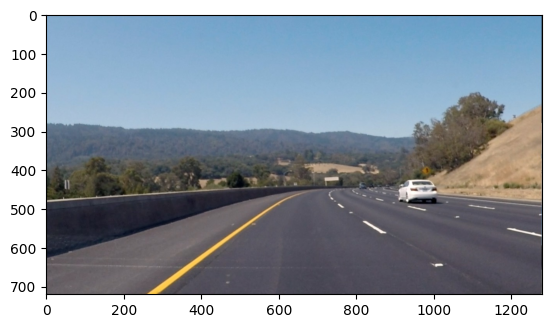

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

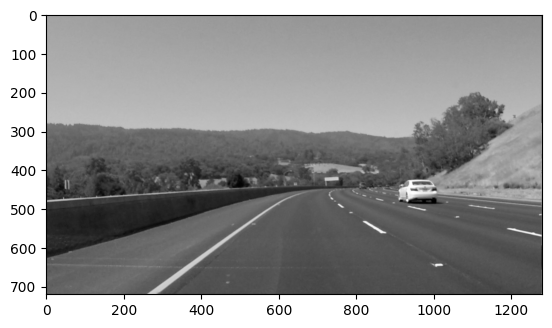

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

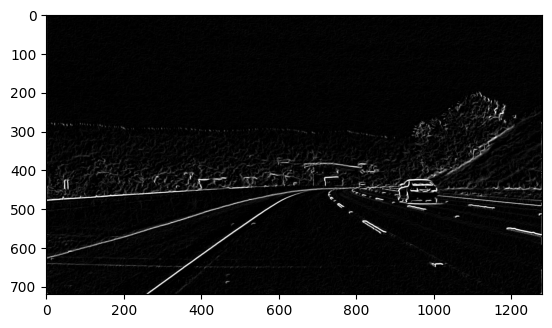

In [19]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

filtered_image = cv2.magnitude(filtered_image_x.astype(np.float32), filtered_image_y.astype(np.float32))
filtered_image = cv2.convertScaleAbs(filtered_image)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



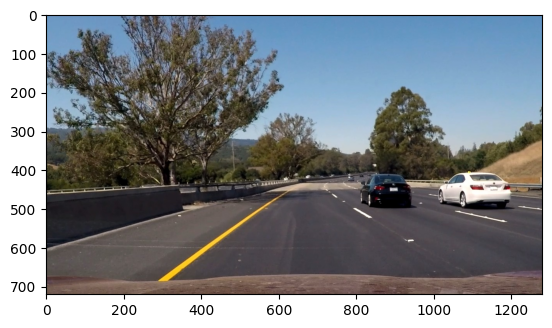

In [23]:
# Read in the image
image = mpimg.imread('data/bridge_trees_example.jpg')

plt.imshow(image)

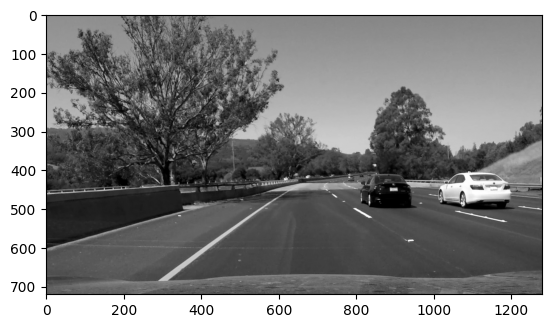

In [24]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

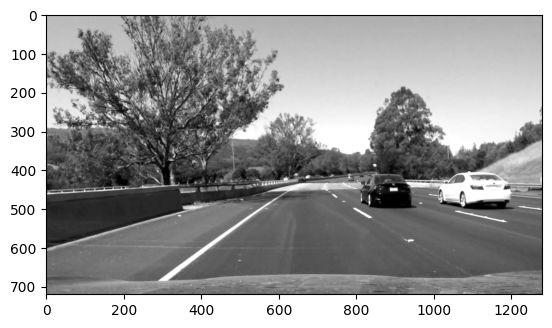

In [25]:
decimal_filter = np.array([[0.1, 0.1, 0.1], 
                           [0.1, 0.5, 0.1], 
                           [0.1, 0.1, 0.1]])

filtered_image = cv2.filter2D(gray, -1, decimal_filter)
plt.imshow(filtered_image, cmap='gray')

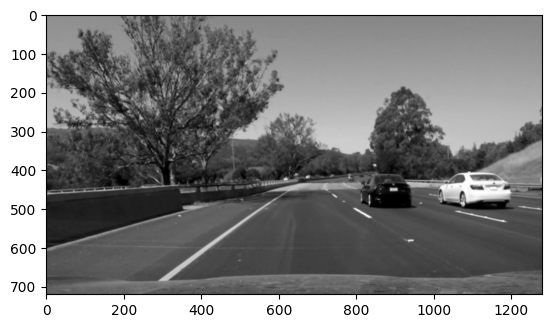

In [26]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')

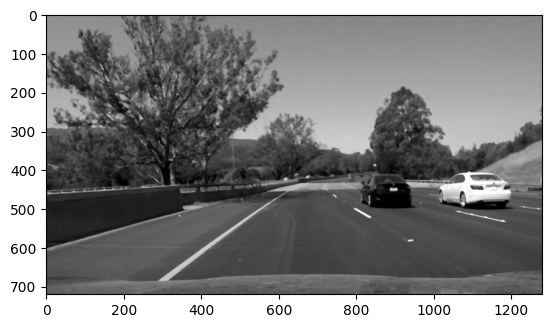

In [27]:
median_filtered = cv2.medianBlur(gray, 5)
plt.imshow(median_filtered, cmap='gray')

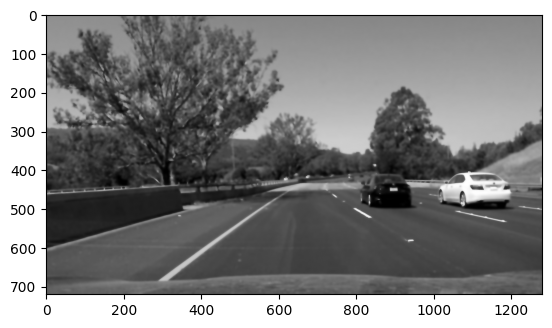

In [28]:
bilateral_filtered = cv2.bilateralFilter(gray, 9, 75, 75)
plt.imshow(bilateral_filtered, cmap='gray')